# Course: Coursera - Python data analysis
## Project: Visualization
## Autor: Stureiko Igor
## Date: 28.01.2021

## Импорт библиотек

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as offline
from plotly.graph_objs import *
import re

### Загрузка данных

In [53]:
df = pd.read_csv('CompleteDataset.csv', low_memory=False)

In [54]:
df.head(2)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0


### Общая информация о датасете

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

In [27]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [140]:
df['Value'][17977]

'€0'

In [135]:
df['Value_num'] = df['Value']

In [136]:
df['Value_num'] = df['Value_num'].str.replace('€','')

In [137]:
df['Value_num']

0        95.5M
1         105M
2         123M
3          97M
4          61M
         ...  
17976      50K
17977        0
17978      60K
17979      60K
17980      50K
Name: Value_num, Length: 17981, dtype: object

In [159]:
df['Value_num_C'] = df['Value_num'].str.extract(r"([M, K]$)",expand=True)

In [180]:
df['Value_num'] = df['Value_num'].str.replace(r'[M, K]$', '')

In [189]:
df['Value_num'] = pd.to_numeric(df['Value_num'], errors='coerce')

In [194]:
df['Value_num'].dtype

dtype('float64')

In [204]:
df['Value_itog'] = df[df['Value_num_C'] == 'M']['Value_num']*1000

In [205]:
df['Value_itog']

0         95500.0
1        105000.0
2        123000.0
3         97000.0
4         61000.0
           ...   
17976         NaN
17977         NaN
17978         NaN
17979         NaN
17980         NaN
Name: Value_itog, Length: 17981, dtype: float64

### Распределение игроков по возрасту

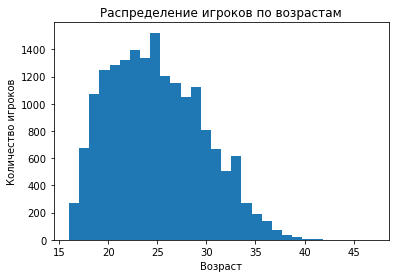

In [13]:
plt.hist(df['Age'], bins=30)
plt.title('Распределение игроков по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.show()

Сравнение зависимости зарплаты от возраста игрока. Можно найти самые большие команды и сравнить эти зависимости между ними

In [22]:
dtotal = ({"Total":["Total Price: 4 x 2 = 8","Total Price 200 Price_per_piece 10 Amount 20"]})
dt = pd.DataFrame(dtotal)

data = []
for item in dt['Total']:
    regex = re.findall(r"(\d+)\D+(\d+)\D+(\d+)",item)
    regex = (map(list,regex))
    data.append(list(map(int,list(regex)[0])))
dftotal = pd.DataFrame(data, columns=['Total','Price_per_piece','Amount'])
print(dftotal)

NameError: name 're' is not defined